In [1]:
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as sns

In [3]:
sp500_companies = pd.read_csv('sp500companies.csv')

In [4]:
print(sp500_companies.head())

  Exchange Symbol              Shortname               Longname  \
0      NMS   AAPL             Apple Inc.             Apple Inc.   
1      NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
2      NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   
3      NMS   GOOG          Alphabet Inc.          Alphabet Inc.   
4      NMS   AMZN       Amazon.com, Inc.       Amazon.com, Inc.   

                   Sector                        Industry  Currentprice  \
0              Technology            Consumer Electronics        172.99   
1              Technology         Software—Infrastructure        327.29   
2  Communication Services  Internet Content & Information       2869.45   
3  Communication Services  Internet Content & Information       2884.41   
4       Consumer Cyclical                 Internet Retail       3408.34   

      Marketcap        Ebitda  Revenuegrowth           City State  \
0  2.838140e+12  1.202330e+11          0.288      Cupertino    CA   
1  2.465

In [7]:
sp_marketcap = sp500_companies.loc[:,['Shortname','Marketcap']]
print(sp_marketcap.head())

               Shortname     Marketcap
0             Apple Inc.  2.838140e+12
1  Microsoft Corporation  2.465010e+12
2          Alphabet Inc.  1.909750e+12
3          Alphabet Inc.  1.909000e+12
4       Amazon.com, Inc.  1.728530e+12


In [8]:
type(sp_marketcap['Marketcap'])

pandas.core.series.Series

In [10]:
 marketcapnumpy = np.array(sp_marketcap['Marketcap'])
print(marketcapnumpy)

[2.83814000e+12 2.46501000e+12 1.90975000e+12 1.90900000e+12
 1.72853000e+12 9.47611000e+11 9.04114000e+11 8.16940000e+11
 6.70924000e+11 4.73916000e+11 4.72500000e+11 4.59781000e+11
 4.40331000e+11 4.15171000e+11 3.91236000e+11 3.86233000e+11
 3.78678000e+11 3.47600000e+11 3.29984000e+11 2.74447000e+11
 2.68223000e+11 2.65268000e+11 2.65127000e+11 2.63270000e+11
 2.57193000e+11 2.56129000e+11 2.55496000e+11 2.54027000e+11
 2.53637000e+11 2.49086000e+11 2.48506000e+11 2.41371000e+11
 2.39197000e+11 2.33385000e+11 2.32910000e+11 2.29736000e+11
 2.24477000e+11 2.23913000e+11 2.22633000e+11 2.22188000e+11
 2.18513000e+11 2.05009000e+11 2.02566000e+11 1.97987000e+11
 1.97281000e+11 1.91272000e+11 1.81910000e+11 1.81507000e+11
 1.81137000e+11 1.77413000e+11 1.74740000e+11 1.74198000e+11
 1.73113000e+11 1.72117000e+11 1.69713000e+11 1.66402000e+11
 1.60907000e+11 1.56925000e+11 1.50989000e+11 1.45007000e+11
 1.40071000e+11 1.38931000e+11 1.38638000e+11 1.38111000e+11
 1.34539000e+11 1.326970

In [11]:
np.mean(marketcapnumpy)

87348426160.28629

In [12]:
np.sum(marketcapnumpy)

43936258358624.0

In [13]:
np.ptp(marketcapnumpy) #range

2837765164704.0

In [ ]:
#A little complicated and dificult to work with so I will Divide by a billion to simplify

In [14]:
marketcapsbln = marketcapnumpy/1000000000

In [15]:
np.ptp(marketcapsbln)


2837.7651647039997

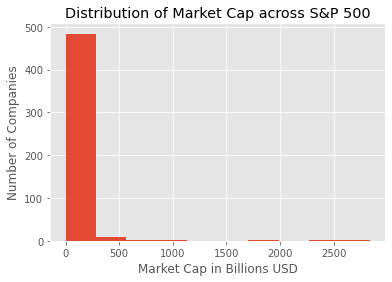

In [50]:
plt.hist(marketcapsbln, bins=10, )
plt.xlabel('Market Cap in Billions USD')
plt.ylabel('Number of Companies')
plt.title('Distribution of Market Cap across S&P 500')
plt.show()

In [18]:
#Sort the dataframe to find the top ten and bottom ten by market cap

In [22]:
Marketcap_largest = sp_marketcap.sort_values('Marketcap', ascending = False)
Marketcap_largest.head(15)

,Shortname,Marketcap
0,Apple Inc.,2.838140e+12
1,Microsoft Corporation,2.465010e+12
2,Alphabet Inc.,1.909750e+12
3,Alphabet Inc.,1.909000e+12
4,"Amazon.com, Inc.",1.728530e+12
5,"Meta Platforms, Inc.",9.476110e+11
6,"Tesla, Inc.",9.041140e+11
7,General Electric Company,8.169400e+11
8,Berkshire Hathaway Inc. New,6.709240e+11
9,Visa Inc.,4.739160e+11


In [24]:
#find the other market caps to create a data frame

In [26]:
sp500_companies.iloc[:, 2]

0                         Apple Inc.
1              Microsoft Corporation
2                      Alphabet Inc.
3                      Alphabet Inc.
4                   Amazon.com, Inc.
                   ...              
498           Alaska Air Group, Inc.
499                  Gap, Inc. (The)
500                 Hanesbrands Inc.
501    Leggett & Platt, Incorporated
502              Coterra Energy Inc.
Name: Shortname, Length: 503, dtype: object

In [27]:
print(sp500_companies.iloc[:, 2])

0                         Apple Inc.
1              Microsoft Corporation
2                      Alphabet Inc.
3                      Alphabet Inc.
4                   Amazon.com, Inc.
                   ...              
498           Alaska Air Group, Inc.
499                  Gap, Inc. (The)
500                 Hanesbrands Inc.
501    Leggett & Platt, Incorporated
502              Coterra Energy Inc.
Name: Shortname, Length: 503, dtype: object


In [29]:
Shortnamenumpy = np.array(sp_marketcap['Shortname'])
print(Shortnamenumpy)

['Apple Inc.' 'Microsoft Corporation' 'Alphabet Inc.' 'Alphabet Inc.'
 'Amazon.com, Inc.' 'Meta Platforms, Inc.' 'Tesla, Inc.'
 'General Electric Company' 'Berkshire Hathaway Inc. New' 'Visa Inc.'
 'JP Morgan Chase & Co.' 'UnitedHealth Group Incorporated'
 'Johnson & Johnson' 'Home Depot, Inc. (The)' 'Walmart Inc.'
 'Procter & Gamble Company (The)' 'Bank of America Corporation'
 'Mastercard Incorporated' 'Pfizer, Inc.' 'Walt Disney Company (The)'
 'Netflix, Inc.' 'Adobe Inc.' 'Broadcom Inc.' 'Nike, Inc.'
 'Cisco Systems, Inc.' 'Exxon Mobil Corporation' 'Oracle Corporation'
 'Eli Lilly and Company' 'Thermo Fisher Scientific Inc'
 'Coca-Cola Company (The)' 'Accenture plc' 'Costco Wholesale Corporation'
 'Abbott Laboratories' 'Pepsico, Inc.' 'Salesforce.com Inc' 'AbbVie Inc.'
 'Comcast Corporation' 'Danaher Corporation' 'Chevron Corporation'
 'PayPal Holdings, Inc.' 'Verizon Communications Inc.' 'Intel Corporation'
 'QUALCOMM Incorporated' 'Wells Fargo & Company' "McDonald's Corporation"


In [ ]:
#Now I want to create a dataframe with MarketCap & Name to join with the sentiment analysis

In [36]:
SPTopCompanies = sp500_companies.iloc[:16, 2:8]

In [37]:
print(SPTopCompanies)

                          Shortname                         Longname  \
0                        Apple Inc.                       Apple Inc.   
1             Microsoft Corporation            Microsoft Corporation   
2                     Alphabet Inc.                    Alphabet Inc.   
3                     Alphabet Inc.                    Alphabet Inc.   
4                  Amazon.com, Inc.                 Amazon.com, Inc.   
5              Meta Platforms, Inc.             Meta Platforms, Inc.   
6                       Tesla, Inc.                      Tesla, Inc.   
7          General Electric Company         General Electric Company   
8       Berkshire Hathaway Inc. New          Berkshire Hathaway Inc.   
9                         Visa Inc.                        Visa Inc.   
10            JP Morgan Chase & Co.             JPMorgan Chase & Co.   
11  UnitedHealth Group Incorporated  UnitedHealth Group Incorporated   
12                Johnson & Johnson                Johnson & Joh

In [ ]:
#Drop some values after based on testing Sentiment Analysis

In [38]:
SPTopCompanies.drop(['Longname','Sector', 'Industry',], axis = 1, inplace = True)

In [39]:
print(SPTopCompanies)

                          Shortname  Currentprice     Marketcap
0                        Apple Inc.        172.99  2.838140e+12
1             Microsoft Corporation        327.29  2.465010e+12
2                     Alphabet Inc.       2869.45  1.909750e+12
3                     Alphabet Inc.       2884.41  1.909000e+12
4                  Amazon.com, Inc.       3408.34  1.728530e+12
5              Meta Platforms, Inc.        334.20  9.476110e+11
6                       Tesla, Inc.        938.53  9.041140e+11
7          General Electric Company         93.06  8.169400e+11
8       Berkshire Hathaway Inc. New        293.24  6.709240e+11
9                         Visa Inc.        215.38  4.739160e+11
10            JP Morgan Chase & Co.        156.09  4.725000e+11
11  UnitedHealth Group Incorporated        487.21  4.597810e+11
12                Johnson & Johnson        167.21  4.403310e+11
13           Home Depot, Inc. (The)        390.47  4.151710e+11
14                     Walmart Inc.     

In [45]:
SPTopCompanies.drop([2,7,8,9,11,15])

,Shortname,Currentprice,Marketcap
0,Apple Inc.,172.99,2.838140e+12
1,Microsoft Corporation,327.29,2.465010e+12
3,Alphabet Inc.,2884.41,1.909000e+12
4,"Amazon.com, Inc.",3408.34,1.728530e+12
5,"Meta Platforms, Inc.",334.20,9.476110e+11
6,"Tesla, Inc.",938.53,9.041140e+11
10,JP Morgan Chase & Co.,156.09,4.725000e+11
12,Johnson & Johnson,167.21,4.403310e+11
13,"Home Depot, Inc. (The)",390.47,4.151710e+11
14,Walmart Inc.,139.62,3.912360e+11
